### <p style="text-align: right;"> Alexis Guevara

# Two-Space Dimensions Finite-Difference Methods

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline  
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt

Implement different finite difference approximations of $\partial_x u(x_i,y_j)$ and $\partial_yu(x_i,y_j)$. The formulas are 
- case 1 
$$\partial_x u(x_i,y_j) \approx \frac{u_{i+1,j}-u_{i,j}}{\Delta x}$$
- case 2
$$\partial_y u(x_i,y_j) \approx \frac{u_{i,j}-u_{i,j-1}}{\Delta y}$$
- case 3 
$$\partial_x u(x_i,y_j) + \partial_y u(x_i,y_j) \approx \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}$$


In [7]:
def mesh_2d(N):
    # this function generates the indexes of neighboring points of all points in the mesh containing N x N nodes.
    # We consider periodic functions
    # input 
    #  N: the number of nodes in each dimension
    # outputs 
    #  index: index of all nodes. For example, u[index[1]] is approximating 
    #         u( get_x_coord(index[1],a,b,dx,N) , get_y_coord(index[1],c,d,N) )
    #  node2node: contains all neighboring nodes for all nodes. For example, consider the situation 
    #                                    north 
    #                              west    A    east
    #                                    south
    #             and that node A has index[1] so node node east = node2node[index[1],0], 
    #             node west = node2node[index[1],1], node north = node2node[index[1],2], and 
    #             node south = node2node[index[1],3] 
    index = np.arange(0,N*N)
    node2node = np.zeros((N*N,4),dtype=int)
    for i in range(1,N*N+1):
        east = i + N
        if east > N*N:
            east = i - (N-2)*N
        west = i - N 
        if west <= 0:
            west = i + (N-2)*N
        north = i - 1 
        if np.mod(north,N) == 0: 
            north = i + (N-2)
        south = i + 1 
        if np.mod(south,N) == 1:
            south = i - (N-2)
        node2node[i-1] = [east, west, north, south] 
    node2node = node2node -1 
    return index, node2node
def get_x_coord(ind, a, b, dx, N):
    # this function returns the x-coordinates associated with the node at a given index. We consider x in [a,b]
    # inputs 
    #  ind: index for the node we seek the x-coordinate
    #  a: left endpoint of the domain in x
    #  b: right endpoint of the domain in x 
    #  dx: mesh size
    #  N: the number of nodes in each dimension
    # output
    #  x: the x-coordinate of the node at index ind
    x = a + np.floor(ind/N)*dx
    return x 
def get_y_coord(ind, c, d, dy, N):
    # this function returns the y-coordinates associated with the node at a given index. We consider y in [c,d]
    # inputs 
    #  ind: index for the node we seek the y-coordinate
    #  c: left endpoint of the domain in y
    #  d: right endpoint of the domain in y 
    #  dy: mesh size
    #  N: the number of nodes in each dimension
    # output
    #  y: the y-coordinate of the node at index ind
    y = d - np.mod(ind,N)*dy
    return y 
def visualization(a,b,c,d,N,U):
    # this function plots the approximations. We consider a 2-D domain [a,b]x[c,d].
    # inputs 
    #  a: left endpoint of the domain in x
    #  b: right endpoint of the domain in x 
    #  c: left endpoint of the domain in y
    #  d: right endpoint of the domain in y 
    #  N: the number of nodes in each dimension
    #  U: 1-D array containing the numerical solution
    # no output
    
    x_coord = np.linspace(a,b,N)
    y_coord = np.linspace(d,c,N)
    x_coord, y_coord = np.meshgrid(x_coord, y_coord)
    U = U.reshape(N,N).transpose()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(x_coord, y_coord, U, cmap=cm.coolwarm)
    ax.set_xlim(a,b)
    ax.set_ylim(c,d)
    ax.set_zlim(np.min(U),np.max(U))
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$U$')
    plt.show()

**Task 1**

Using Taylor expansions, find the order of the approximation in case 3. 

Consider the finite difference approximation of $\partial_x u(x_i,y_j) + \partial_yu(x_i,y_j)$ in case 3: 

$$\partial_x u(x_i,y_j) + \partial_y u(x_i,y_j) \approx \frac{u(x_{i+1},y_{j})-u(x_{i-1},y_{j})}{2\Delta x} + \frac{u(x_{i},y_{j+1})-u(x_{i},y_{j-1})}{2\Delta y}$$

Consider the local Taylor series expansions of a function $u(x_{i},y_{j})$ at a fixed point $(x_{i},y_{j})$:

\begin{equation}
    \begin{aligned}
        u(x_{i+1},y_{j}) =&\,\, u(x_{i},y_{j}) + \Delta x \cdot \partial_x u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xx} u(x_{i},y_{j})}{2} + \Delta x^{3} \cdot \frac{\partial_{xxx} u(\xi_{1},y_{j})}{6} \text{ for some $\xi_{1}$ between $x_{i}$ and $x_{i+1}$} \\
        u(x_{i-1},y_{j}) =&\,\, u(x_{i},y_{j}) - \Delta x \cdot \partial_x u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xx} u(x_{i},y_{j})}{2} - \Delta x^{3} \cdot \frac{\partial_{xxx} u(\xi_{2},y_{j})}{6} \text{ for some $\xi_{2}$ between $x_{i-1}$ and $x_{i}$} \\
        u(x_{i},y_{j+1}) =&\,\, u(x_{i},y_{j}) + \Delta y \cdot \partial_y u(x_{i},y_{j}) + \Delta y^{2} \cdot \frac{\partial_{yy} u(x_{i},y_{j})}{2} + \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\xi_{3})}{6} \text{ for some $\xi_{3}$ between $y_{i}$ and $y_{i+1}$} \\
        u(x_{i},y_{j-1}) =&\,\, u(x_{i},y_{j}) - \Delta y \cdot \partial_y u(x_{i},y_{j}) + \Delta y^{2} \cdot \frac{\partial_{yy} u(x_{i},y_{j})}{2} - \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\xi_{4})}{6} \text{ for some $\xi_{4}$ between $y_{i-1}$ and $y_{i}$}
    \end{aligned}
\end{equation}


Examining the first term of the finite difference in case 3, we get


\begin{equation}
    \begin{aligned}
        \frac{u(x_{i+1},y_{j}) - u(x_{i-1},y_{j})}{2\Delta x} =&\,\, \frac{\left( u(x_{i},y_{j}) + \Delta x \cdot \partial_x u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xx} u(x_{i},y_{j})}{2} + \Delta x^{3} \cdot \frac{\partial_{xxx} u(\xi_{1},y_{j})}{6} \right) - \left( u(x_{i},y_{j}) - \Delta x \cdot \partial_x u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xx} u(x_{i},y_{j})}{2} - \Delta x^{3} \cdot \frac{\partial_{xxx} u(\xi_{2},y_{j})}{6} \right)}{2\Delta x} \\
        \frac{u(x_{i+1},y_{j}) - u(x_{i-1},y_{j})}{2\Delta x} =&\,\, \frac{\left( 2 \Delta x \cdot \partial_x u(x_{i},y_{j}) + \Delta x^{3} \cdot \frac{\partial_{xxx} u(\xi_{1},y_{j})}{6} + \Delta x^{3} \cdot \frac{\partial_{xxx} u(\xi_{2},y_{j})}{6} \right)}{2\Delta x}
    \end{aligned}
\end{equation}


By the Intermediate Value Theorem:
\begin{equation}
    \begin{aligned}
        \frac{\partial_{xxx} u(\xi_{1},y_{j})}{6} + \frac{\partial_{xxx} u(\xi_{2},y_{j})}{6} = \frac{\partial_{xxx} u(\zeta_1,y_{j})}{3} \text{ for some $\zeta_1$ between $x_{i-1}$ and $x_{i+1}$}
    \end{aligned}
\end{equation}

So we have
\begin{equation}
    \begin{aligned}
        \frac{u(x_{i+1},y_{j}) - u(x_{i-1},y_{j})}{2\Delta x} =&\,\, \frac{\left( 2 \Delta x \cdot \partial_x u(x_{i},y_{j}) + \Delta x^{3} \cdot \frac{\partial_{xxx} u(\zeta_{1},y_{j})}{3} \right)}{2\Delta x} \\
        \frac{u(x_{i+1},y_{j}) - u(x_{i-1},y_{j})}{2\Delta x} =&\,\, \partial_x u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xxx} u(\zeta_{1},y_{j})}{6}         
    \end{aligned}
\end{equation}

Examining the second term of the finite difference in case 3, we get

\begin{equation}
    \begin{aligned}
        \frac{u(x_{i},y_{j+1}) - u(x_{i},y_{j-1})}{2\Delta y} =&\,\, \frac{\left( u(x_{i},y_{j}) + \Delta y \cdot \partial_y u(x_{i},y_{j}) + \Delta y^{2} \cdot \frac{\partial_{yy} u(x_{i},y_{j})}{2} + \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\xi_{3})}{6} \right) - \left( u(x_{i},y_{j}) - \Delta y \cdot \partial_y u(x_{i},y_{j}) + \Delta y^{2} \cdot \frac{\partial_{yy} u(x_{i},y_{j})}{2} - \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\xi_{4})}{6}  \right)}{2\Delta y} \\
        \frac{u(x_{i},y_{j+1}) - u(x_{i},y_{j-1})}{2\Delta y} =&\,\, \frac{ 2 \Delta y \cdot \partial_y u(x_{i},y_{j}) + \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\xi_{3})}{6} + \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\xi_{4})}{6} }{2\Delta y} \\
    \end{aligned}
\end{equation}

By the Intermediate Value Theorem:
\begin{equation}
    \begin{aligned}
        \frac{\partial_{yyy} u(x_{i},\xi_{3})}{6} + \frac{\partial_{yyy} u(x_{i},\xi_{4})}{6} = \frac{\partial_{yyy} u(x_{i},\zeta_2)}{3} \text{ for some $\zeta_2$ between $y_{j-1}$ and $y_{j+1}$}
    \end{aligned}
\end{equation}

So we have
\begin{equation}
    \begin{aligned}
        \frac{u(x_{i},y_{j+1}) - u(x_{i},y_{j-1})}{2\Delta y} =&\,\, \frac{\left( 2 \Delta y \cdot \partial_y u(x_{i},y_{j}) + \Delta y^{3} \cdot \frac{\partial_{yyy} u(x_{i},\zeta_{2})}{3} \right)}{2\Delta y} \\
        \frac{u(x_{i},y_{j+1}) - u(x_{i},y_{j-1})}{2\Delta y} =&\,\, \partial_y u(x_{i},y_{j}) + \Delta y^{2} \cdot \frac{\partial_{yyy} u(x_{i},\zeta_{2})}{6}         
    \end{aligned}
\end{equation}

Combining both terms together of the finite difference, we get

\begin{equation}
    \begin{aligned}
        \partial_x u(x_i,y_j) + \partial_y u(x_i,y_j) =&\,\, \partial_x u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xxx} u(\zeta_{1},y_{j})}{6} + \partial_y u(x_{i},y_{j}) + \Delta y^{2} \cdot \frac{\partial_{yyy} u(x_{i},\zeta_{2})}{6} \\
        \partial_x u(x_i,y_j) + \partial_y u(x_i,y_j) =&\,\, \partial_x u(x_{i},y_{j}) + \partial_y u(x_{i},y_{j}) + \Delta x^{2} \cdot \frac{\partial_{xxx} u(\zeta_{1},y_{j})}{6} + \Delta y^{2} \cdot \frac{\partial_{yyy} u(x_{i},\zeta_{2})}{6} \\
    \end{aligned}
\end{equation}

Therefore, the exact error for method 3 is $\Delta x^{2} \cdot \frac{\partial_{xxx} u(\zeta_{1},y_{j})}{6} + \Delta y^{2} \cdot \frac{\partial_{yyy} u(x_{i},\zeta_{2})}{6}$ . Since the highest power in the error in the Taylor series expansion involves $\Delta x^{2}$ and $\Delta y^{2}$, the order of approximation of case 3 is 2.


**Task 2**

Create a function `finite_difference_app` that computes an approximation of either $\partial_x u(x_i,y_j)$, $\partial_y u(x_i,y_j)$ or $\partial_x u(x_i,y_j) + \partial_y u(x_i,y_j)$ for all the nodes of the mesh.

The inputs of the function are the mesh sizes $\Delta x$ and $\Delta y$, the table `node2node`, a vector `U` containing the values $u(x_i,y_j)$ and the identification number of the approximation (1, 2 or 3) that you will call `case`. The output is the vector `dU` containing the approximations $\partial_x u(x_i,y_j)$, $\partial_y u(x_i,y_j)$ or $\partial_x u(x_i,y_j) + \partial_y u(x_i,y_j)$.

In [11]:
def finite_difference_app(dx, dy, node2node, U, case):
    # Initialize approximations of u(x_i,y_j)
    dU = np.zeros_like(U)
    
    # Compute finite difference approximation for each case
    if case == 1:
        for i in range(len(U)):            
            dU[i] = (U[node2node[i, 0]] - U[i]) / dx
    if case == 2:
        for i in range(len(U)):
            dU[i] = (U[i] - U[node2node[i, 3]]) / dy
    if case == 3:
        for i in range(len(U)):
            dU[i] = ((U[node2node[i, 0]] - U[node2node[i, 1]]) / (2*dx) +
                     (U[node2node[i, 2]] - U[node2node[i, 3]]) / (2*dy))

    return dU


**Task 3**

Verify your function `finite_difference_app` by performing a convergence plot for each formula. To do so, estimate the derivatives of $u(x) = \sin(2\pi x)\cos(2\pi y)$ for $(x,y) \in \Omega = [0,1]\times[0,1]$. Consider $N \in \{10,20,40,80,160\}$. Note that you must use your function `finite_difference_app`. You will generate 3 plots that illustrate the absolute error using the maximum norm as a function of $h=\Delta x= \Delta y$ (one for each formula) and verify the order of each formula. Verify if the results make sense

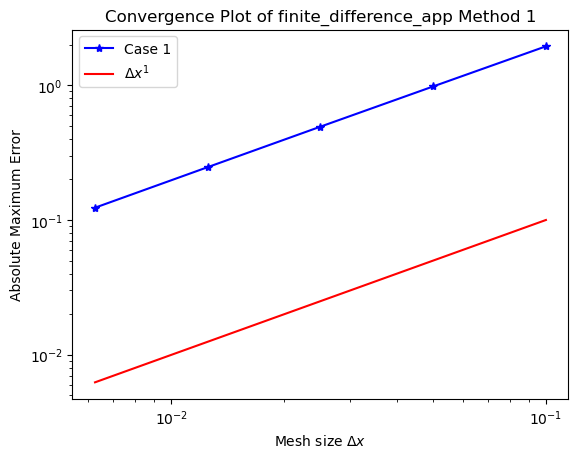

In [13]:
# CASE 1

# Define function u(x,y)
def u(x, y):
    return np.sin(2*np.pi*x) * np.cos(2*np.pi*y)

# Partial Derivative of u(x,y) w.r.t. x
def du_dx_exact(x, y):
    return 2 * np.pi * np.cos(2*np.pi*x) * np.cos(2*np.pi*y)

# Initialize maximum errors & mesh sizes
max_errors_1 = []
h_values = []

for N in [10, 20, 40, 80, 160]:
    # Compute mesh size
    h = 1.0 / N
    h_values.append(h)
    
    # Generate mesh & compute function values at mesh points
    index, node2node = mesh_2d(N)
    U = u(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))
    
    # Finite difference approximations
    dU_dx_approx  = finite_difference_app(h, h, node2node, U, 1)
    
    # Exact Derivative
    dU_dx_exact   = du_dx_exact(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))

    # Absolute Maximum Errors
    max_errors_1.append(np.max(np.abs(dU_dx_approx[N:-N] - dU_dx_exact[N:-N])))
    
# Convergence Plot
plt.loglog(h_values, max_errors_1, label='Case 1', color="blue", marker="*", linestyle="-")
plt.loglog(h_values, h_values, label='$\Delta x^{1}$',color="red",linestyle="-")
plt.title('Convergence Plot of finite_difference_app Method 1')
plt.xlabel('Mesh size $\Delta x$')
plt.ylabel('Absolute Maximum Error')
plt.legend()
plt.show()

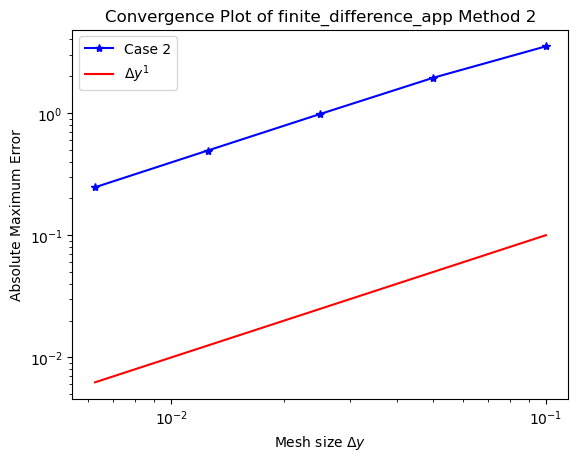

In [14]:
# CASE 2

# Define function u(x,y)
def u(x, y):
    return np.sin(2*np.pi*x) * np.cos(2*np.pi*y)

# Partial Derivative of u(x,y) w.r.t. y
def du_dy_exact(x, y):
    return -2 * np.pi * np.sin(2*np.pi*x) * np.sin(2*np.pi*y)

# Initialize maximum errors & mesh sizes
max_errors_2 = []
h_values = []

for N in [10, 20, 40, 80, 160]:
    # Compute mesh size
    h = 1.0 / N
    h_values.append(h)
    
    # Generate mesh & compute function values at mesh points
    index, node2node = mesh_2d(N)
    U = u(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))
    
    # Finite difference approximations
    dU_dy_approx  = finite_difference_app(h, h, node2node, U, 2)
    
    # Exact Derivative
    dU_dy_exact   = du_dy_exact(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))
    
    # Absolute Maximum Errors
    max_errors_2.append(np.max(np.abs(dU_dy_approx - dU_dy_exact)))

# Convergence Plot
plt.loglog(h_values, max_errors_2, label='Case 2', color="blue", marker="*", linestyle="-")
plt.loglog(h_values, h_values, label='$\Delta y^{1}$',color="red",linestyle="-")
plt.title('Convergence Plot of finite_difference_app Method 2')
plt.xlabel('Mesh size $\Delta y$')
plt.ylabel('Absolute Maximum Error')
plt.legend()
plt.show()

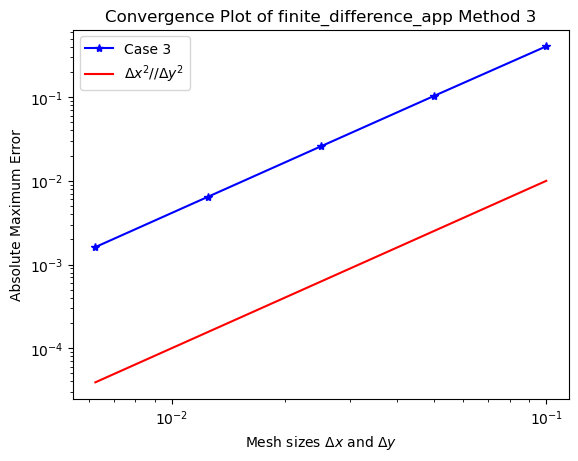

In [15]:
# CASE 3

# Define function u(x,y)
def u(x, y):
    return np.sin(2*np.pi*x) * np.cos(2*np.pi*y)

# Partial Derivative of u(x,y) w.r.t. x
def du_dx_exact(x, y):
    return 2 * np.pi * np.cos(2*np.pi*x) * np.cos(2*np.pi*y)

# Partial Derivative of u(x,y) w.r.t. y
def du_dy_exact(x, y):
    return -2 * np.pi * np.sin(2*np.pi*x) * np.sin(2*np.pi*y)

# Initialize maximum errors & mesh sizes
max_errors_3 = []
h_values = []

# Loop over the different values of N
for N in [10, 20, 40, 80, 160]:
    # Compute mesh size
    h = 1.0 / N
    h_values.append(h)
    
    # Generate mesh & compute function values at mesh points
    index, node2node = mesh_2d(N)
    U = u(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))

    # Compute the finite difference approximations
    dU_sum_approx = finite_difference_app(h, h, node2node, U, 3)

    # Compute the exact derivatives
    dU_dx_exact = du_dx_exact(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))
    dU_dy_exact = du_dy_exact(get_x_coord(index, 0, 1, h, N), get_y_coord(index, 0, 1, h, N))
    dU_sum_exact = dU_dx_exact + dU_dy_exact
    
    # Compute the maximum errors
    interior_points = np.array([i for i in range(N*N) if i % N != 0 and i % N != N - 1 and i // N != 0 and i // N != N - 1])
    max_errors_3.append(np.max(np.abs(dU_sum_approx[interior_points] - dU_sum_exact[interior_points])))

# Convergence Plot
plt.loglog(h_values, max_errors_3, label='Case 3', color="blue", marker="*", linestyle="-")
plt.loglog(h_values, [h**2 for h in h_values], label='$\Delta x^{2} // \Delta y^{2}$',color="red",linestyle="-")
plt.title('Convergence Plot of finite_difference_app Method 3')
plt.xlabel('Mesh sizes $\Delta x$ and $\Delta y$')
plt.ylabel('Absolute Maximum Error')
plt.legend()
plt.show()


Yes, the results make sense since it is expected that the first-order forward and backward finite difference methods would yield an order of convergence of 1 and the centered finite difference method would yield an order of convergence of 2. The order of convergence for the centered finite difference method can also be observed through the analysis made in Question 1. 

Initially, the convergence plot for Method 2 was the only method to produce the expected order of convergence of 1. The convergence plots for Method 1 and Method 3 did not indicate the expected order of convergence and suggested  errors to be present. The approach taken to resolve the issue was to exclude the boundary points within the mesh or grid for Method 1 and Method 3. With the changes made, the convergence plot was able to produce the expected results.

Therefore, for method 1 and method 3, the boundary points within the mesh are excluded to obtain the expected results, which can be done since both methods utilize the previous points while method 2 does not.


Thus, there might be errors when using the methods on the boundary points when using backward and centered finite differences to approximate the partial derivatives of the function $u(x,y)$.

Another possible issue might be within the code since the periodic functions are being considered.
